In [2]:
import pandas as pd

## Dataset A

In [3]:
# Import compiled movie file
movies = pd.read_csv("~/code/aybik/movie_picker/raw_data/compiled_movies.csv")

In [42]:
movies.crew_dict.isnull().sum()

np.int64(131739)

In [5]:
## Create movie_id
movies['movie_year'] = movies['name'] + '-' + movies['date'].astype(str)

In [6]:
# Check for nulls
movies.isnull().sum()

id                  0
name               10
date            91913
description    160812
minute         181570
rating         850598
genre_list     265106
actor_list     307295
language        36020
studio_list    503400
crew_dict      136825
movie_year         10
dtype: int64

In [7]:
# For now let's drop movies with the same name
# ?? How should we deal with this?
movies = movies.drop_duplicates(subset=['movie_year'])


In [8]:
movies.name.value_counts()

name
Carmen                          47
Love                            46
Cinderella                      44
Untitled                        43
Mother                          43
                                ..
Kurusu Serapio                   1
The Crystal Girl                 1
In the Steps of Trisha Brown     1
The Wild Pacific                 1
青ひげ公の城                           1
Name: count, Length: 795421, dtype: int64

## Dataset B

In [9]:
# import csv files
B_movie = pd.read_csv("~/code/aybik/movie_picker/raw_data/Set_B/movie_data.csv", engine='python')
B_rating = pd.read_csv("~/code/aybik/movie_picker/raw_data/Set_B/ratings_export.csv")
B_users = pd.read_csv("~/code/aybik/movie_picker/raw_data/Set_B/users_export.csv")

In [10]:
B_movie

,_id,genres,image_url,imdb_id,imdb_link,movie_id,movie_title,original_language,overview,popularity,production_countries,release_date,runtime,spoken_languages,tmdb_id,tmdb_link,vote_average,vote_count,year_released
0,5fc85f606758f69634496fd3,"[""Music"",""Animation""]",film-poster/4/6/4/4/4/0/464440-football-freaks...,NaN,NaN,football-freaks,Football Freaks,en,"Football crazy, football mad. Don’t watch this...",0.600,"[""United Kingdom""]",1971-12-05,0.0,[],535272.0,https://www.themoviedb.org/movie/535272/,0.0,0.0,1971.0
1,5fc85ff26758f696344ace0c,[],film-poster/2/4/5/5/0/0/245500-aftermath-0-230...,tt0586129,http://www.imdb.com/title/tt0586129/maindetails,aftermath-1960,Aftermath,en,Aftermath was the pilot for an unsold TV serie...,0.600,[],1960-04-17,22.0,[],318331.0,https://www.themoviedb.org/movie/318331/,8.0,1.0,1960.0
2,5fc85f606758f69634496fcd,"[""Drama""]",film-poster/9/3/3/1/8/93318-where-chimneys-are...,tt0045731,http://www.imdb.com/title/tt0045731/maindetails,where-chimneys-are-seen,Where Chimneys Are Seen,ja,Gosho’s most celebrated film both in Japan and...,1.568,"[""Japan""]",1953-03-05,108.0,"[""日本語""]",117779.0,https://www.themoviedb.org/movie/117779/,6.6,10.0,1953.0
3,5fc85f606758f69634496fd1,"[""Drama""]",NaN,tt0187327,http://www.imdb.com/title/tt0187327/maindetails,the-musicians-daughter,The Musician's Daughter,en,Carl Wagner's good wife was dying. His heart b...,0.600,"[""United States of America""]",1911-12-12,15.0,[],560377.0,https://www.themoviedb.org/movie/560377/,0.0,0.0,1911.0
4,5fc85f606758f69634496fd4,"[""Documentary""]",film-poster/4/5/4/6/0/3/454603-50-years-of-fab...,tt4769914,http://www.imdb.com/title/tt4769914/maindetails,50-years-of-fabulous,50 Years of Fabulous,en,50 Years of Fabulous recounts the rich history...,0.600,[],2018-05-17,75.0,[],525187.0,https://www.themoviedb.org/movie/525187/,0.0,0.0,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285958,6239f32da936b95600b301d8,NaN,NaN,NaN,NaN,the-western-world-of-sailor-moon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285959,6239f32da936b95600b301e8,NaN,NaN,NaN,NaN,shadowplay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285960,6239f32da936b95600b301f2,NaN,NaN,NaN,NaN,only-always-you,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285961,6239f32da936b95600b301fb,NaN,NaN,NaN,NaN,one-night-stand-ellen-degeneres,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
B_users

,_id,display_name,num_ratings_pages,num_reviews,username
0,5fc4172ec6cd28ebd99dd0e2,Lucy,32.0,1650,deathproof
1,5fc4172ec6cd28ebd99dd0ea,Matt Singer,52.0,1915,superpulse
2,5fc4172ec6cd28ebd99dd0ed,Sean Baker,21.0,1283,lilfilm
3,5fc4172ec6cd28ebd99dd0ee,iana,37.0,1177,ianamurray
4,5fc419171ebf67b9fbe48615,Lizzy,57.0,1810,punchdrunklizzy
...,...,...,...,...,...
8134,6239b430a936b956009c993c,Máté Turi-Mészáros,NaN,237,mateazember
8135,6239cbf7a936b95600a2d24c,Finn,NaN,297,finnvor1
8136,6239d254a936b95600a4472f,Daniel,NaN,1231,daniel
8137,6239df37a936b95600aa7aa5,ButterflyFilms,NaN,800,butterflyfilms


In [12]:
B_rating

,_id,movie_id,rating_val,user_id
0,5fc57c5d6758f6963451a07f,feast-2014,7,deathproof
1,5fc57c5d6758f6963451a063,loving-2016,7,deathproof
2,5fc57c5d6758f6963451a0ef,scripted-content,7,deathproof
3,5fc57c5d6758f6963451a060,the-future,4,deathproof
4,5fc57c5c6758f69634519398,mank,5,deathproof
...,...,...,...,...
11078162,6239f4f1a936b95600b3d798,alien-3,6,turnitip
11078163,6239f4f1a936b95600b3d799,battleship-potemkin,7,turnitip
11078164,6239f4f1a936b95600b3d79e,pusher,6,turnitip
11078165,6239f4f1a936b95600b3d7a1,wild-strawberries,7,turnitip


### Create a Dictionary for user ratings

In [13]:
movie_rating_dict = B_rating.groupby(['movie_id']).apply(lambda x: x.set_index('user_id')['rating_val'].to_dict()).to_dict()
movie_rating_dict

/var/folders/6j/6_13thh50qqgx2lhw_0qf67m0000gn/T/ipykernel_53953/2557361146.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  movie_rating_dict = B_rating.groupby(['movie_id']).apply(lambda x: x.set_index('user_id')['rating_val'].to_dict()).to_dict()


{'0-uhr-15-zimmer-9': {'acervofilmico': 5, 'punq': 5},
 '00-00': {'kadethenerd': 1, 'glennggm': 7, 'harrydoug': 1},
 '00-08': {'jacdeswilliams': 5,
  'stottiain': 7,
  'deepbluefunk': 7,
  'akabsb': 4,
  'hibiscus': 7,
  'hotsake': 6,
  'monsoonchowder': 7,
  'ghettominibar': 4,
  'evilbjork': 6,
  'yrlove': 8,
  'rovhul': 5,
  'shanye_glizzy': 9,
  'stacys__mom': 4,
  'royarch': 6,
  'selaserviette': 9,
  'benpatten02': 6,
  'entity': 1,
  'sufian502': 1,
  'shikhar': 5},
 '00-schneider-im-wendekreis-der-eidechse': {'lohmi': 8,
  'entlauber': 8,
  'kinomensch': 7,
  'psychotic': 6,
  'brodiesfilmkrit': 1,
  'hypenswert': 6,
  'binder_palogi': 8,
  'col_plimp': 9,
  'weicherkeks': 7,
  'spoonietox': 8,
  'shookone': 8,
  'acervofilmico': 5,
  'ashcrow': 7,
  'leftside24': 6,
  'patrick_suite': 7},
 '00-schneider-jagd-auf-nihil-baxter': {'leschroeck': 6,
  'cinemaniax': 9,
  'entlauber': 10,
  'adrian_ko': 7,
  'brodiesfilmkrit': 1,
  'hypenswert': 6,
  'erikhatspass': 1,
  'smile69c': 

In [14]:
B_rating['movie_ratings_dict'] = B_rating['movie_id'].map(movie_rating_dict)
B_rating.drop(columns=["user_id", "rating_val"], axis=1, inplace=True)


In [15]:
B_rating = B_rating.drop_duplicates(subset='movie_id')


In [16]:
B_rating

,_id,movie_id,movie_ratings_dict
0,5fc57c5d6758f6963451a07f,feast-2014,"{'deathproof': 7, 'ingridgoeswest': 10, 'dirkh..."
1,5fc57c5d6758f6963451a063,loving-2016,"{'deathproof': 7, 'davidehrlich': 7, 'adrianba..."
2,5fc57c5d6758f6963451a0ef,scripted-content,"{'deathproof': 7, 'davidfinchher': 8, 'justmia..."
3,5fc57c5d6758f6963451a060,the-future,"{'deathproof': 4, 'dirkh': 1, 'suspirliam': 7,..."
4,5fc57c5c6758f69634519398,mank,"{'deathproof': 5, 'davidehrlich': 8, 'superpul..."
...,...,...,...
11077853,6239f32ca936b95600b2f2a4,the-western-world-of-sailor-moon,{'nyavaeh': 8}
11077902,6239f32ca936b95600b2f351,shadowplay,{'nyavaeh': 4}
11077941,6239f32ca936b95600b2f3f3,only-always-you,{'nyavaeh': 7}
11078032,6239f32ca936b95600b2f50a,one-night-stand-ellen-degeneres,{'nyavaeh': 8}


### Merge B movies and ratings

In [17]:
B_data = pd.merge(B_rating[['movie_id', 'movie_ratings_dict']], B_movie[['movie_id', 'movie_title', 'year_released']], on='movie_id', how='inner')

In [18]:
B_data[B_data['movie_title'] == 'Parasite']


,movie_id,movie_ratings_dict,movie_title,year_released
1272,parasite-2019,"{'kurstboy': 10, 'davidehrlich': 9, 'adrianbal...",Parasite,2019.0
17668,parasite,"{'nevermore1985': 7, 'auteur': 3, 'connorcarey...",Parasite,1982.0
137471,parasite-1,{'yaanu': 6},Parasite,NaN
138558,parasite-2004,"{'veganluke': 1, 'filmgnome': 3, 'elcochran90'...",Parasite,2004.0
167715,parasite-2014,{'scaggsaway': 2},Parasite,2014.0


### Create new movie_id

One movie has several ids:
parasite-2019, parasite, parasite-1,	parasite-2004, Parasite	2004.0, parasite-2014	

In [19]:
B_data.drop(columns='movie_id', axis=1, inplace=True)

In [20]:
B_data['movie_year'] = B_data['movie_title'] + '-' + B_data['year_released'].astype(str)

### Merge A and B

In [21]:
# Try with a few columns
A_B_data = pd.merge(movies[['name', 'date', 'movie_year']], B_data[['movie_title', 'movie_ratings_dict', 'movie_year']], on= 'movie_year', how='inner')


In [32]:
A_B_data = A_B_data.drop_duplicates(subset=['movie_year'])


In [33]:
A_B_data

,name,date,movie_year,movie_title,movie_ratings_dict
0,Parasite,2019.0,Parasite-2019.0,Parasite,"{'kurstboy': 10, 'davidehrlich': 9, 'adrianbal..."
1,Everything Everywhere All at Once,2022.0,Everything Everywhere All at Once-2022.0,Everything Everywhere All at Once,"{'dozzyrok': 10, 'davidehrlich': 9, 'rockmaroo..."
2,Fight Club,1999.0,Fight Club-1999.0,Fight Club,"{'kurstboy': 9, 'davidehrlich': 9, 'adrianbalb..."
3,La La Land,2016.0,La La Land-2016.0,La La Land,"{'deathproof': 10, 'kurstboy': 10, 'davidehrli..."
4,Interstellar,2014.0,Interstellar-2014.0,Interstellar,"{'kurstboy': 7, 'davidehrlich': 8, 'adrianbalb..."
...,...,...,...,...,...
259725,On a Phantom Limb,NaN,On a Phantom Limb-nan,On a Phantom Limb,{'wisemanofheaven': 6}
259726,Gone But Not Forgotten,NaN,Gone But Not Forgotten-nan,Gone But Not Forgotten,"{'varan_the_man': 5, 'kaijuman': 5, 'champ83':..."
259731,NoctiIuca,NaN,NoctiIuca-nan,NoctiIuca,{'agmcinefilo': 4}
259732,Plum,NaN,Plum-nan,Plum,{'kyleh': 1}


In [27]:
A_B_data.isnull().sum()

name                     1
date                  1904
movie_year               1
movie_title              1
movie_ratings_dict       1
dtype: int64

In [24]:
# Trw with whole movies(A) dataframe
A_B_data_2 = pd.merge(movies[['name', 'date', 'genre_list', 'actor_list','minute', 'rating', 'language', 'description', 'movie_year', 'studio_list', 'crew_dict']], B_data[['movie_ratings_dict', 'movie_year']], on="movie_year", how='inner')


In [34]:
A_B_data_2 = A_B_data_2.drop_duplicates(subset=['movie_year'])


In [35]:
A_B_data_2

,name,date,genre_list,actor_list,minute,rating,language,description,movie_year,studio_list,crew_dict,movie_ratings_dict
0,Parasite,2019.0,"['Comedy', 'Thriller', 'Drama']","['Song Kang-ho', 'Lee Sun-kyun', 'Cho Yeo-jeon...",133.0,4.56,Korean,"All unemployed, Ki-taek's family takes peculia...",Parasite-2019.0,['Barunson E&A'],"{'Cinematography': ['Hong Kyung-pyo'], 'Compos...","{'kurstboy': 10, 'davidehrlich': 9, 'adrianbal..."
1,Everything Everywhere All at Once,2022.0,"['Science Fiction', 'Adventure', 'Comedy', 'Ac...","['Michelle Yeoh', 'Ke Huy Quan', 'Stephanie Hs...",140.0,4.30,English,An aging Chinese immigrant is swept up in an i...,Everything Everywhere All at Once-2022.0,"['IAC Films', 'AGBO', 'Ley Line Entertainment'...","{'Cinematography': ['Larkin Seiple'], 'Compose...","{'dozzyrok': 10, 'davidehrlich': 9, 'rockmaroo..."
2,Fight Club,1999.0,['Drama'],"['Edward Norton', 'Brad Pitt', 'Helena Bonham ...",139.0,4.27,English,A ticking-time-bomb insomniac and a slippery s...,Fight Club-1999.0,"['Fox 2000 Pictures', 'Regency Enterprises', '...","{'Cinematography': ['Jeff Cronenweth'], 'Compo...","{'kurstboy': 9, 'davidehrlich': 9, 'adrianbalb..."
3,La La Land,2016.0,"['Drama', 'Comedy', 'Music', 'Romance']","['Ryan Gosling', 'Emma Stone', 'John Legend', ...",129.0,4.09,English,"Mia, an aspiring actress, serves lattes to mov...",La La Land-2016.0,"['Summit Entertainment', 'Black Label Media', ...","{'Cinematography': ['Linus Sandgren'], 'Compos...","{'deathproof': 10, 'kurstboy': 10, 'davidehrli..."
4,Interstellar,2014.0,"['Science Fiction', 'Drama', 'Adventure']","['Matthew McConaughey', 'Anne Hathaway', 'Mich...",169.0,4.35,English,The adventures of a group of explorers who mak...,Interstellar-2014.0,"['Legendary Pictures', 'Syncopy', 'Lynda Obst ...","{'Cinematography': ['Hoyte van Hoytema'], 'Com...","{'kurstboy': 7, 'davidehrlich': 8, 'adrianbalb..."
...,...,...,...,...,...,...,...,...,...,...,...,...
259730,Between Worlds,NaN,['Science Fiction'],NaN,13.0,NaN,English,A lone figure wanders the deserted Earth in se...,Between Worlds-nan,NaN,{'Director': ['David Bryant']},{'elbitjusticiero': 10}
259731,NoctiIuca,NaN,NaN,NaN,6.0,NaN,Spanish,Pablo is 9 years old and lives in the country....,NoctiIuca-nan,NaN,NaN,{'agmcinefilo': 4}
259732,Plum,NaN,NaN,NaN,10.0,NaN,English,A kid runs off to the desert to clear his head...,Plum-nan,NaN,NaN,{'kyleh': 1}
259733,The Woodsman,NaN,"['Drama', 'Fantasy']",['Gin Fedotov'],15.0,NaN,English,An isolated Woodsman discovers a Calico Cat in...,The Woodsman-nan,"['SunCross Productions', 'Mezzo & Co.']","{'Cinematography': ['Kaito Nyunoya'], 'Directo...",{'filmgnome': 2}


In [36]:
A_B_data_2.isnull().sum()

name                       1
date                    2373
genre_list             33938
actor_list             46413
minute                 11010
rating                175435
language               11755
description             9474
movie_year                 1
studio_list            88256
crew_dict              11526
movie_ratings_dict         1
dtype: int64

## Questions

- How do we want to keep our user ratings? As a dict? Then how will we use them for model?

- We can find the years of movies, should we do it?

- 

# Cleaned Data

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("~/code/aybik/movie_picker/raw_data/clean_compile.csv")

In [4]:
data.head()

,Unnamed: 0,id,name,date,description,minute,genre_list,actor_list,language,crew_dict,key_b
0,0,1000002,Parasite,2019,"All unemployed, Ki-taek's family takes peculia...",133.0,"['Comedy', 'Thriller', 'Drama']","['Song Kang-ho', 'Lee Sun-kyun', 'Cho Yeo-jeon...",Korean,"{'Cinematography': ['Hong Kyung-pyo'], 'Compos...",Parasite (2019)
1,1,1000003,Everything Everywhere All at Once,2022,An aging Chinese immigrant is swept up in an i...,140.0,"['Science Fiction', 'Adventure', 'Comedy', 'Ac...","['Michelle Yeoh', 'Ke Huy Quan', 'Stephanie Hs...",English,"{'Cinematography': ['Larkin Seiple'], 'Compose...",Everything Everywhere All at Once (2022)
2,2,1000004,Fight Club,1999,A ticking-time-bomb insomniac and a slippery s...,139.0,['Drama'],"['Edward Norton', 'Brad Pitt', 'Helena Bonham ...",English,"{'Cinematography': ['Jeff Cronenweth'], 'Compo...",Fight Club (1999)
3,3,1000005,La La Land,2016,"Mia, an aspiring actress, serves lattes to mov...",129.0,"['Drama', 'Comedy', 'Music', 'Romance']","['Ryan Gosling', 'Emma Stone', 'John Legend', ...",English,"{'Cinematography': ['Linus Sandgren'], 'Compos...",La La Land (2016)
4,4,1000006,Oppenheimer,2023,The story of J. Robert Oppenheimer's role in t...,181.0,"['Drama', 'History']","['Cillian Murphy', 'Emily Blunt', 'Matt Damon'...",English,"{'Cinematography': ['Hoyte van Hoytema'], 'Com...",Oppenheimer (2023)


In [5]:
data = data.drop(columns=["id", "Unnamed: 0"]).reset_index(drop=True)

In [6]:
data

,name,date,description,minute,genre_list,actor_list,language,crew_dict,key_b
0,Parasite,2019,"All unemployed, Ki-taek's family takes peculia...",133.0,"['Comedy', 'Thriller', 'Drama']","['Song Kang-ho', 'Lee Sun-kyun', 'Cho Yeo-jeon...",Korean,"{'Cinematography': ['Hong Kyung-pyo'], 'Compos...",Parasite (2019)
1,Everything Everywhere All at Once,2022,An aging Chinese immigrant is swept up in an i...,140.0,"['Science Fiction', 'Adventure', 'Comedy', 'Ac...","['Michelle Yeoh', 'Ke Huy Quan', 'Stephanie Hs...",English,"{'Cinematography': ['Larkin Seiple'], 'Compose...",Everything Everywhere All at Once (2022)
2,Fight Club,1999,A ticking-time-bomb insomniac and a slippery s...,139.0,['Drama'],"['Edward Norton', 'Brad Pitt', 'Helena Bonham ...",English,"{'Cinematography': ['Jeff Cronenweth'], 'Compo...",Fight Club (1999)
3,La La Land,2016,"Mia, an aspiring actress, serves lattes to mov...",129.0,"['Drama', 'Comedy', 'Music', 'Romance']","['Ryan Gosling', 'Emma Stone', 'John Legend', ...",English,"{'Cinematography': ['Linus Sandgren'], 'Compos...",La La Land (2016)
4,Oppenheimer,2023,The story of J. Robert Oppenheimer's role in t...,181.0,"['Drama', 'History']","['Cillian Murphy', 'Emily Blunt', 'Matt Damon'...",English,"{'Cinematography': ['Hoyte van Hoytema'], 'Com...",Oppenheimer (2023)
...,...,...,...,...,...,...,...,...,...
379198,Popeye's Travels,1960,Popeye's journey in this short is based upon t...,7.0,['Animation'],['Jack Mercer'],English,{'Director': ['Seymour Kneitel']},Popeye's Travels (1960)
379199,Tiger Burger,1960,Popeye and Wimpy are in India where the native...,5.0,['Animation'],"['Jack Mercer', 'Jackson Beck']",English,"{'Composer': ['Ken Lowman'], 'Director': ['Jac...",Tiger Burger (1960)
379200,The Spendthrift,1915,A remarkable six-part adaptation of a sensatio...,66.0,['Drama'],"['Irene Fenwick', 'Cyril Keightley', 'Malcolm ...",English,"{'Director': ['Walter Edwin'], 'Writer': ['Por...",The Spendthrift (1915)
379201,De lefvande dödas klubb,1914,The suicidal gambler Tom Haget receives an inv...,53.0,['Drama'],"['William Larsson', 'Carl Barcklind', 'Hedvig ...",Swedish,"{'Cinematography': ['Julius Jaenzon'], 'Direct...",De lefvande dödas klubb (1914)


In [7]:
# numeric: date, minute
# category: genre_list, actor_list, language, crew_dict
# text: description

## Minıte

In [8]:
min_value = data['minute'].min()
print("Minimum value:", min_value)

# Maximum value
max_value = data['minute'].max()
print("Maximum value:", max_value)

Minimum value: 1.0
Maximum value: 72000.0


In [9]:
top_5_max = data['minute'].nlargest(10)
print("Top 5 Maximum Values:")
print(top_5_max)

Top 5 Maximum Values:
151965    72000.0
276544    58800.0
221854    13319.0
293886     6120.0
114285     6060.0
46117      5220.0
299780     4537.0
105158     4485.0
45844      4320.0
47274      4320.0
Name: minute, dtype: float64


/Users/aybikealkan/.pyenv/versions/3.10.6/envs/movie_picker/lib/python3.10/site-packages/seaborn/_statistics.py:32: UserWarning: A NumPy version >=1.23.5 and <2.5.0 is required for this version of SciPy (detected version 1.23.4)
  from scipy.stats import gaussian_kde


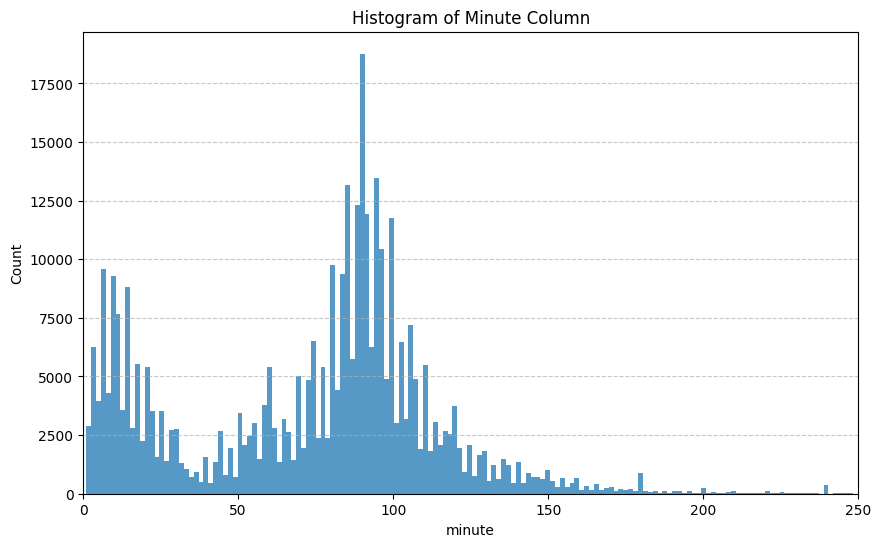

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(data['minute'], kde=False)
plt.title('Histogram of Minute Column')
plt.xlim(0, 250)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Filter movie for reasonable length

In [11]:
data_new = data[(data['minute'] > 40) & (data['minute'] <= 240)]
data_new.shape


(279055, 9)

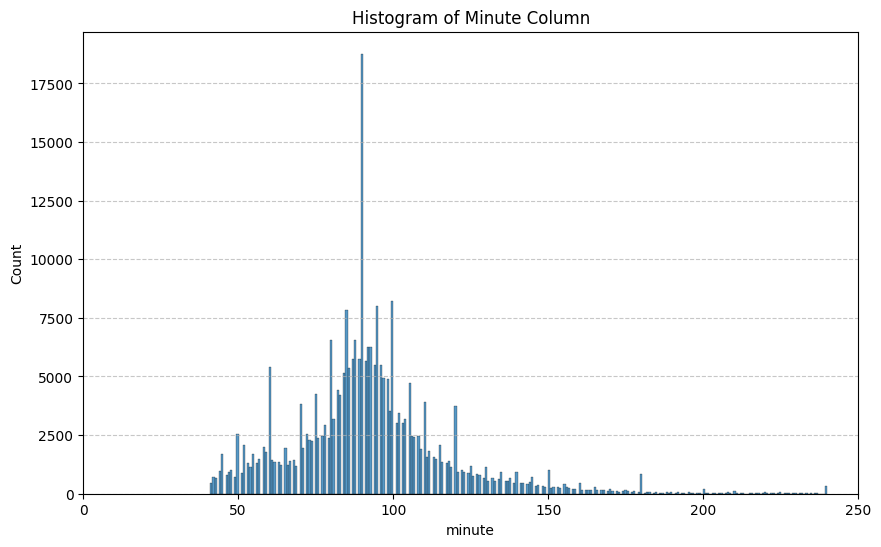

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(data_new['minute'], kde=False)
plt.title('Histogram of Minute Column')
plt.xlim(0, 250)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [12]:
data_new

,name,date,description,minute,genre_list,actor_list,language,crew_dict,key_b
0,Parasite,2019,"All unemployed, Ki-taek's family takes peculia...",133.0,"['Comedy', 'Thriller', 'Drama']","['Song Kang-ho', 'Lee Sun-kyun', 'Cho Yeo-jeon...",Korean,"{'Cinematography': ['Hong Kyung-pyo'], 'Compos...",Parasite (2019)
1,Everything Everywhere All at Once,2022,An aging Chinese immigrant is swept up in an i...,140.0,"['Science Fiction', 'Adventure', 'Comedy', 'Ac...","['Michelle Yeoh', 'Ke Huy Quan', 'Stephanie Hs...",English,"{'Cinematography': ['Larkin Seiple'], 'Compose...",Everything Everywhere All at Once (2022)
2,Fight Club,1999,A ticking-time-bomb insomniac and a slippery s...,139.0,['Drama'],"['Edward Norton', 'Brad Pitt', 'Helena Bonham ...",English,"{'Cinematography': ['Jeff Cronenweth'], 'Compo...",Fight Club (1999)
3,La La Land,2016,"Mia, an aspiring actress, serves lattes to mov...",129.0,"['Drama', 'Comedy', 'Music', 'Romance']","['Ryan Gosling', 'Emma Stone', 'John Legend', ...",English,"{'Cinematography': ['Linus Sandgren'], 'Compos...",La La Land (2016)
4,Oppenheimer,2023,The story of J. Robert Oppenheimer's role in t...,181.0,"['Drama', 'History']","['Cillian Murphy', 'Emily Blunt', 'Matt Damon'...",English,"{'Cinematography': ['Hoyte van Hoytema'], 'Com...",Oppenheimer (2023)
...,...,...,...,...,...,...,...,...,...
379195,Red Ink Ghost Stories,1968,The vampire Yoshitsune appeared at Rashomon ev...,45.0,"['Horror', 'TV Movie']","['Masaya Kikawada', 'Tomoko Sekihara', '源九郎判官義経']",Japanese,{'Director': ['Kentaro Uchida']},Red Ink Ghost Stories (1968)
379196,Svichka's Wedding,1962,"A spectacle version of Ivan Franko Theater, ba...",95.0,['Drama'],"['Viktor Tsymbalist', 'Olga Kusenko', 'Dmytro ...",Ukrainian,"{'Cinematography': ['Serhiy Revenko'], 'Compos...",Svichka's Wedding (1962)
379197,Two Brothers,1961,"Two brothers, Utpal (elder) and Kamal (younger...",123.0,"['Drama', 'Romance']","['Uttam Kumar', 'Biswajeet Chatterjee', 'Sabit...","Bengali, Bangla","{'Cinematography': ['Bibhuti Chakraborty'], 'D...",Two Brothers (1961)
379200,The Spendthrift,1915,A remarkable six-part adaptation of a sensatio...,66.0,['Drama'],"['Irene Fenwick', 'Cyril Keightley', 'Malcolm ...",English,"{'Director': ['Walter Edwin'], 'Writer': ['Por...",The Spendthrift (1915)


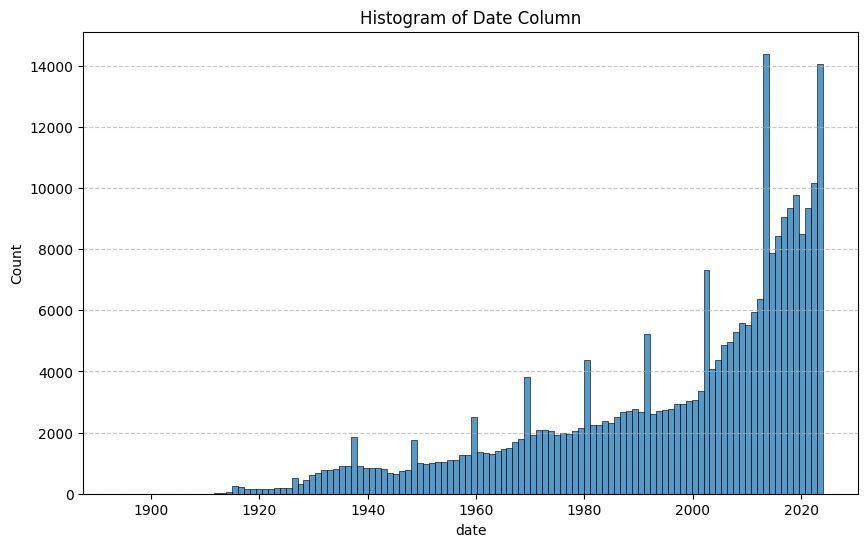

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(data_new['date'], kde=False)
plt.title('Histogram of Date Column')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Preproccessing 

In [14]:
import pandas as pd
import string
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.feature_extraction.text import TfidfVectorizer

def text_preprocess(sentence):
    # Basic cleaning
    sentence = sentence.strip() ## remove whitespaces
    sentence = sentence.lower() ## lowercase
    sentence = ''.join(char for char in sentence if not char.isdigit()) ## remove numbers #TODO
    # Advanced cleaning
    for punctuation in string.punctuation:
        sentence = sentence.replace(punctuation, '') ## remove punctuation
    tokenized_sentence = word_tokenize(sentence) ## tokenize
    stop_words = set(stopwords.words('english'))
    stopwords_removed = [w for w in tokenized_sentence if not w in stop_words]
    v_lemmatized = [
        WordNetLemmatizer().lemmatize(word, pos = "v")
        for word in stopwords_removed
    ]
    n_lemmatized = [
        WordNetLemmatizer().lemmatize(word, pos = "n")
        for word in v_lemmatized
    ]
    cleaned_sentence = ' '.join(word for word in n_lemmatized)
    return cleaned_sentence

def num_preprocess_year(value):
    scaler = RobustScaler()
    result = scaler.fit_transform(value)
    return result

def num_preprocess_min(value):
    scaler = MinMaxScaler()
    result = scaler.fit_transform(value)
    return result

def cat_processing_genre(df, value):
    unique_genres = set(genre for genres in df[value] for genre in eval(genres))
    for genre in unique_genres:
        df[genre] = df[value].apply(lambda x: 1 if genre in x else 0)
    return df.rename(columns={
    'science fiction': 'science_fiction',
    'tv movie': 'tv_movie'
    })

def cat_processing_lan(df, value):
    temp_lang = (df[value].value_counts()/df[value].value_counts().sum())*100
    temp = list(temp_lang.head(20).keys())
    df_filtered = df[df[value].isin(temp)]
    return df_filtered

def data_preproc(df):
    df['description'] = df['description'].apply(text_preprocess)
    df['date'] = num_preprocess_year(df[['date']])
    df['minute'] = num_preprocess_min(df[['minute']])
    cat_processing_genre(df,'genre_list')
    cat_processing_lan(df, 'language')
    return df

def text_encode(df):
    vectorizer =TfidfVectorizer()
    X = vectorizer.fit_transform(df['description'])
    X = pd.DataFrame(
        X.toarray(),
        columns = vectorizer.get_feature_names_out()
        )
    return X

In [15]:
data_sampled = data_new.sample(n=10000)

In [26]:
cleaned_data = data_preproc(data_sampled)
cleaned_data.set_index("key_b", inplace=True)

KeyError: "None of ['key_b'] are in the columns"

In [27]:
type(cleaned_data)

pandas.core.frame.DataFrame

In [28]:
### WORKING CELL 1
## does not use text_encode function yet!
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

tfidf_vectorizer = TfidfVectorizer(stop_words='english')  # Initialize vectorizer
tfidf_matrix = tfidf_vectorizer.fit_transform(cleaned_data['description'])
similarity_matrix = cosine_similarity(tfidf_matrix)
similarity_df = pd.DataFrame(similarity_matrix,
                             index=cleaned_data.index,
                             columns=cleaned_data.index)


In [29]:
similarity_df

key_b,Underdogs (2018),The Men in Black (1992),"Lovers, Liars and Thieves (1997)",First Love (2007),Prey of the Chameleon (1992),Fishing Moon (1980),Joking Jazz 4G (2016),On Her Shoulders (2018),Lointaine Andromède (2023),Kids vs. Aliens (2022),...,Soulmates (1992),Kedi Billa Killadi Ranga (2013),Prithipal Singh...a Story (2015),The National Tree (2009),"Dis ek, Anna (2015)",Strange Holiday (1945),عمالقة البحار (1960),Le Cœur sous le paillasson (1976),I Just Killed My Dad (2022),Revenge on the Highway (1992)
key_b,,,,,,,,,,,,,,,,,,,,,
Underdogs (2018),1.000000,0.018317,0.011800,0.018545,0.011177,0.026778,0.009899,0.000000,0.025584,0.009707,...,0.000000,0.012919,0.0,0.009951,0.000000,0.041953,0.00000,0.037889,0.0,0.009907
The Men in Black (1992),0.018317,1.000000,0.025115,0.000000,0.000000,0.000000,0.000000,0.000000,0.007805,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.032454
"Lovers, Liars and Thieves (1997)",0.011800,0.025115,1.000000,0.034771,0.029411,0.016844,0.000000,0.009856,0.030593,0.024397,...,0.000000,0.000000,0.0,0.000000,0.000000,0.028634,0.00000,0.019814,0.0,0.000000
First Love (2007),0.018545,0.000000,0.034771,1.000000,0.026223,0.000000,0.000000,0.014702,0.025149,0.048539,...,0.000000,0.000000,0.0,0.063121,0.021399,0.000000,0.03235,0.023020,0.0,0.000000
Prey of the Chameleon (1992),0.011177,0.000000,0.029411,0.026223,1.000000,0.022067,0.000000,0.000000,0.013713,0.020757,...,0.077138,0.000000,0.0,0.000000,0.013731,0.027642,0.00000,0.026584,0.0,0.011393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Strange Holiday (1945),0.041953,0.000000,0.028634,0.000000,0.027642,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.00000,0.068910,0.0,0.000000
عمالقة البحار (1960),0.000000,0.000000,0.000000,0.032350,0.000000,0.000000,0.000000,0.017542,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.025533,0.000000,1.00000,0.000000,0.0,0.000000
Le Cœur sous le paillasson (1976),0.037889,0.000000,0.019814,0.023020,0.026584,0.015511,0.000000,0.000000,0.019576,0.028678,...,0.043520,0.000000,0.0,0.000000,0.000000,0.068910,0.00000,1.000000,0.0,0.023905


In [33]:
### WORKING CELL 3 --FINAL
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors

# Step 1: Vectorize the text using TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(cleaned_data['description'])

# Step 2: Initialize NearestNeighbors with cosine metric
knn = NearestNeighbors(metric='cosine', algorithm='brute')  # Using brute-force to handle cosine similarity
knn.fit(tfidf_matrix)

# Step 3: Specify the number of neighbors (including the movie itself, so we set n_neighbors=6)
n_neighbors = 6

# Step 4: Compute the nearest neighbors (including itself)
distances, indices = knn.kneighbors(tfidf_matrix, n_neighbors=n_neighbors)

# Step 5: Convert distances to similarity (1 - cosine distance)
similarity_scores = 1 - distances

# Step 6: Create DataFrame for similarity scores and closest neighbors
# For each movie, find the 5 closest neighbors (excluding itself)
neighbors_df = pd.DataFrame(indices[:, 1:],  # Exclude the movie itself (index 0)
                             columns=[f"Neighbor_{i+1}" for i in range(n_neighbors-1)],
                             index=cleaned_data.index)

similarity_df = pd.DataFrame(similarity_scores[:, 1:],  # Exclude the movie itself (index 0)
                             columns=[f"Neighbor_{i+1}" for i in range(n_neighbors-1)],
                             index=cleaned_data.index)

# Map the indices of the neighbors to the actual movie names
for col in neighbors_df.columns:
    neighbors_df[col] = neighbors_df[col].map(lambda idx: cleaned_data.index[idx])

# Display the similarity score and closest neighbors for each movie
print("Similarity Scores (1: most similar, 0: least similar):")
print(similarity_df)

print("\n5 Most Similar Movies (without self):")
print(neighbors_df)

Similarity Scores (1: most similar, 0: least similar):
                                   Neighbor_1  Neighbor_2  Neighbor_3  \
key_b                                                                   
Underdogs (2018)                     0.169956    0.166241    0.162251   
The Men in Black (1992)              0.151218    0.142307    0.130510   
Lovers, Liars and Thieves (1997)     0.265624    0.186206    0.185982   
First Love (2007)                    0.377111    0.273555    0.272507   
Prey of the Chameleon (1992)         0.159654    0.159255    0.148707   
...                                       ...         ...         ...   
Strange Holiday (1945)               0.165678    0.164922    0.164433   
عمالقة البحار (1960)                 0.313496    0.211108    0.200867   
Le Cœur sous le paillasson (1976)    0.178566    0.130461    0.129363   
I Just Killed My Dad (2022)          0.224130    0.170689    0.168190   
Revenge on the Highway (1992)        0.247193    0.233978    0.212069

In [34]:
similarity_df

,Neighbor_1,Neighbor_2,Neighbor_3,Neighbor_4,Neighbor_5
key_b,,,,,
Underdogs (2018),0.169956,0.166241,0.162251,0.147359,0.144593
The Men in Black (1992),0.151218,0.142307,0.130510,0.128521,0.126090
"Lovers, Liars and Thieves (1997)",0.265624,0.186206,0.185982,0.178161,0.166336
First Love (2007),0.377111,0.273555,0.272507,0.209135,0.199289
Prey of the Chameleon (1992),0.159654,0.159255,0.148707,0.141864,0.141617
...,...,...,...,...,...
Strange Holiday (1945),0.165678,0.164922,0.164433,0.160210,0.146462
عمالقة البحار (1960),0.313496,0.211108,0.200867,0.181742,0.180482
Le Cœur sous le paillasson (1976),0.178566,0.130461,0.129363,0.127487,0.127465


In [35]:
neighbors_df

,Neighbor_1,Neighbor_2,Neighbor_3,Neighbor_4,Neighbor_5
key_b,,,,,
Underdogs (2018),Audition Tape 13 (2022),Le choix d'une mère (1998),The White Devil (2019),Premam (2015),My Name Is Thomas (2018)
The Men in Black (1992),The Next 365 Days (2022),Guiding Emily (2023),Blu cobalto (1985),Save the Tiger (1973),Touch Chesi Chudu (2018)
"Lovers, Liars and Thieves (1997)",The Magic Hour (2008),No Tears for the Dead (2014),Five Days (1954),Mustang Sally's Horror House (2006),Seven (1979)
First Love (2007),Nigdy tu juz nie powróce (1990),The Standard (2006),مذكرات تلميذة (1962),Kurumbu (2003),Make a Wish (2022)
Prey of the Chameleon (1992),"So Sweet, So Dead (1972)",Welcome Home (1935),Clay (2007),Headshots (2018),The Prowler (1951)
...,...,...,...,...,...
Strange Holiday (1945),Calibre (2018),Country of Orchards (1972),Main Street to Broadway (1953),When a Spider Bites (1993),December Heat (2008)
عمالقة البحار (1960),Nadia (1986),Eagles Attack At Dawn (1970),Foreign Land (2017),Leila and the Wolves (1984),Dubai Winter Diary VI: Light and Reflections (...
Le Cœur sous le paillasson (1976),Disturbed Married Woman Embarrassing Caress (1...,Harlem Woods (2024),Wherever You Are (1993),Brass (1923),Caroline at Midnight (1994)


In [37]:
cleaned_data

,name,date,description,minute,genre_list,actor_list,language,crew_dict,History,Thriller,...,Science Fiction,Drama,Family,Comedy,TV Movie,Crime,Fantasy,Mystery,Documentary,Adventure
key_b,,,,,,,,,,,,,,,,,,,,,
Underdogs (2018),Underdogs,0.382353,téo frank aspire director decide try luck film...,0.120603,"['Documentary', 'Music']","['Awon', 'Phoniks']",English,{'Director': ['Téo Frank']},0,0,...,0,0,0,0,0,0,0,0,1,0
The Men in Black (1992),The Men in Black,-0.382353,psychiatrist conrad obrien play doug wertz fac...,0.296482,['Science Fiction'],"['Douglas Wertz', 'Cara Miller', 'Michael Well...",English,"{'Cinematography': ['Walter Burbach'], 'Direct...",0,0,...,1,0,0,0,0,0,0,0,0,0
"Lovers, Liars and Thieves (1997)","Lovers, Liars and Thieves",-0.235294,hustler stumble score life madam small country...,0.241206,['Thriller'],"['David Christensen', 'Monique Parent', 'Tane ...",English,"{'Director': ['Harold Frazer'], 'Writer': ['Ha...",0,1,...,0,0,0,0,0,0,0,0,0,0
First Love (2007),First Love,0.058824,story come age come gay marriage sprinkle love...,0.276382,"['Drama', 'Romance']","['Kôichi Imaizumi', 'Takao Kawaguchi', 'Hotaru...",Japanese,"{'Director': ['Kôichi Imaizumi'], 'Writer': ['...",0,0,...,0,1,0,0,0,0,0,0,0,0
Prey of the Chameleon (1992),Prey of the Chameleon,-0.382353,jd return hometown many year leave carrie alta...,0.251256,"['Thriller', 'Action', 'TV Movie']","['Daphne Zuniga', 'James Wilder', 'Alexandra P...",English,"{'Cinematography': ['Randolph Sellars'], 'Comp...",0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Strange Holiday (1945),Strange Holiday,-1.764706,american businessman return hunt trip find fas...,0.100503,"['War', 'Fantasy', 'Science Fiction']","['Claude Rains', 'Bob Stebbins', 'Barbara Bate...",English,"{'Cinematography': ['Robert Surtees'], 'Direct...",0,0,...,1,0,0,0,0,0,1,0,0,0
عمالقة البحار (1960),عمالقة البحار,-1.323529,story arab soldier take place tripartite aggre...,0.296482,"['Drama', 'Thriller', 'War']","['Ahmed Mazhar', 'Nadia Lotfi', 'Youssef Fakhr...",Arabic,"{'Director': ['ElSayed Bedir'], 'Writer': ['El...",0,1,...,0,1,0,0,0,0,0,0,0,0
Le Cœur sous le paillasson (1976),Le Cœur sous le paillasson,-0.852941,order get know two french collaborator better ...,0.507538,['Comedy'],"['Jean Jacques Marcel Guillaume', 'Claire Maur...",French,"{'Composer': ['Franck Barcellini'], 'Director'...",0,0,...,0,0,0,1,0,0,0,0,0,0


In [44]:
### WORKING CELL 3 --FINAL
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors

# Step 1: Vectorize the text using TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(cleaned_data['description'])

# Step 2: Initialize NearestNeighbors with cosine metric
knn = NearestNeighbors(metric='cosine', algorithm='brute')  # Using brute-force to handle cosine similarity
knn.fit(tfidf_matrix)

# Step 3: Specify the number of neighbors (including the movie itself, so we set n_neighbors=6)
n_neighbors = 6

# Step 4: Compute the nearest neighbors (including itself)
distances, indices = knn.kneighbors(tfidf_matrix, n_neighbors=n_neighbors)

# Step 5: Convert distances to similarity (1 - cosine distance)
similarity_scores = 1 - distances

# Step 6: Create DataFrame for similarity scores and closest neighbors
# For each movie, find the 5 closest neighbors (excluding itself)
neighbors_df = pd.DataFrame(indices[:, 1:],  # Exclude the movie itself (index 0)
                             columns=[f"Neighbor_{i+1}" for i in range(n_neighbors-1)],
                             index=cleaned_data.index)

similarity_df = pd.DataFrame(similarity_scores[:, 1:],  # Exclude the movie itself (index 0)
                             columns=[f"Neighbor_{i+1}" for i in range(n_neighbors-1)],
                             index=cleaned_data.index)

# Map the indices of the neighbors to the actual movie names
for col in neighbors_df.columns:
    neighbors_df[col] = neighbors_df[col].map(lambda idx: cleaned_data.index[idx])

# Display the similarity score and closest neighbors for each movie
#print("Similarity Scores (1: most similar, 0: least similar):")
#print(similarity_df)

print("\n5 Most Similar Movies (without self):")
print(neighbors_df)


5 Most Similar Movies (without self):
                                                                          Neighbor_1  \
key_b                                                                                  
Underdogs (2018)                                             Audition Tape 13 (2022)   
The Men in Black (1992)                                     The Next 365 Days (2022)   
Lovers, Liars and Thieves (1997)                               The Magic Hour (2008)   
First Love (2007)                                    Nigdy tu juz nie powróce (1990)   
Prey of the Chameleon (1992)                                So Sweet, So Dead (1972)   
...                                                                              ...   
Strange Holiday (1945)                                                Calibre (2018)   
عمالقة البحار (1960)                                                    Nadia (1986)   
Le Cœur sous le paillasson (1976)  Disturbed Married Woman Embarrassing Caress (1

In [39]:
similarity = pd.read_csv("~/code/aybik/movie_picker/raw_data/similarity_df.csv")

In [40]:
similarity

,key_b,Neighbor_1,Neighbor_2,Neighbor_3,Neighbor_4,Neighbor_5
0,Parasite (2019),0.278313,0.231049,0.225452,0.220376,0.204005
1,Everything Everywhere All at Once (2022),0.370172,0.320317,0.254326,0.253369,0.253174
2,Fight Club (1999),0.221783,0.181726,0.175845,0.174991,0.169701
3,La La Land (2016),0.198345,0.181753,0.181340,0.167478,0.166152
4,Oppenheimer (2023),0.533852,0.501073,0.484009,0.470210,0.442954
...,...,...,...,...,...,...
279050,Red Ink Ghost Stories (1968),0.346578,0.339091,0.282877,0.267405,0.215095
279051,Svichka's Wedding (1962),0.424996,0.352082,0.332694,0.328089,0.327536
279052,Two Brothers (1961),0.410200,0.325026,0.294631,0.289886,0.276578
279053,The Spendthrift (1915),0.204726,0.177524,0.175620,0.174532,0.162451


In [42]:
neighbors = pd.read_csv("~/code/aybik/movie_picker/raw_data/neighbors_df.csv")


In [43]:
neighbors

,key_b,Neighbor_1,Neighbor_2,Neighbor_3,Neighbor_4,Neighbor_5
0,Parasite (2019),Oligor Brothers (2005),Present Company Excluded (2015),Der Traum ihres Lebens (2006),The Escape (1962),Soniyachi Mumbai (1994)
1,Everything Everywhere All at Once (2022),Women (1997),Modern Republic (1995),Good Advice (2001),Planck Constant (2015),The Girl's Wish (1981)
2,Fight Club (1999),Loaded (2008),Deep (2021),House Within The Night (2019),The Free Fall (2021),Primalterapi: vintern 1977 (1978)
3,La La Land (2016),A Song for Mia (2019),I Am Hope (2016),The Love We Had (2022),Born to Be Blue (2015),Dope Boy Magic (2023)
4,Oppenheimer (2023),Oppenheimer: Genius or Madman? (2023),The Oppenheimer Case (1970),Oppenheimer: The Real Story (2023),Oppenheimer After Trinity (2023),The Day After Trinity (1981)
...,...,...,...,...,...,...
279050,Red Ink Ghost Stories (1968),Musashibo Benkei (1942),Misty (1996),Benkei (1997),At the Gate of the Ghost (2011),The Hateful Beast (1970)
279051,Svichka's Wedding (1962),Ivan Franko (1956),Radunitsa (1984),How Ivan Ivanovich fell out with Ivan Nikiforo...,The Power of Fear (2006),Mirgorod and Its Inhabitants (1983)
279052,Two Brothers (1961),To Get to Heaven First You Have to Die (2006),Wada'an ya Faqr (1969),Fleeing from life (1964),A woman is a woman (1978),Rickshawala (2020)
279053,The Spendthrift (1915),Midnight Special (1930),The Day the Music Died (1977),Les cinq parties du monde (2012),Lonesome Ladies (1927),Northanger Abbey (2007)
